In [2]:
import pandas as pd
import numpy as np #for the random integer example
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Dataframe_FWs_2DimensionAnalysis.csv')
df.head(3)

,Unnamed: 0,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y
0,0,EDI,3.174450,-3.484261,1.192143,-0.075289,0.634890,-0.696852
1,1,JBW,1.058523,-2.326687,0.638661,1.070148,0.176420,-0.387781
2,2,NPO,1.485699,-2.469357,0.698662,0.974473,0.247616,-0.411559


In [3]:
df_Numerically = df.copy()
df_Numerically = df_Numerically.drop(columns=['Unnamed: 0'])

In [4]:
df_Numerically.columns, len(df_Numerically)

(Index(['Framework', 'Lat_Var_Sum_X', 'Lat_Var_Sum_Y', 'Lat_Var_Max_X',
        'Lat_Var_Max_Y', 'Lat_Var_Avg_X', 'Lat_Var_Avg_Y'],
       dtype='object'),
 254)

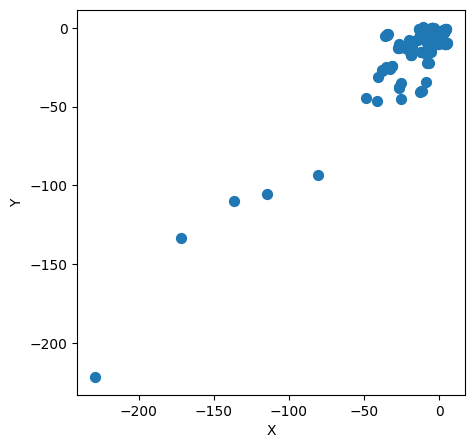

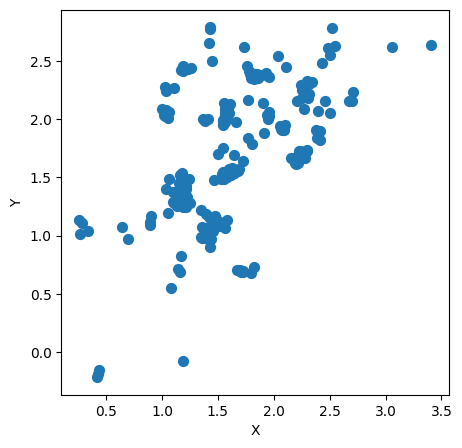

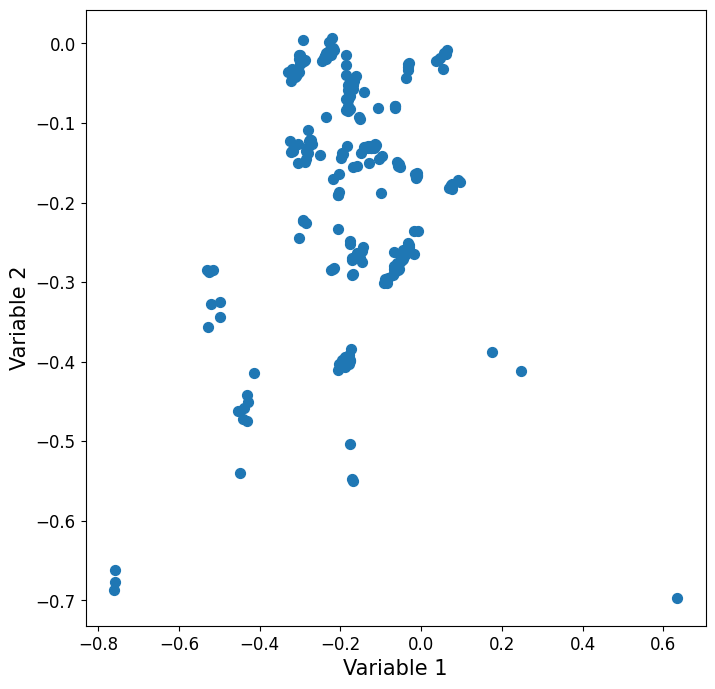

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_Numerically["Lat_Var_Sum_X"], df_Numerically["Lat_Var_Sum_Y"], s = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

fig = plt.figure(figsize=(5,5))
plt.scatter(df_Numerically["Lat_Var_Max_X"], df_Numerically["Lat_Var_Max_Y"], s = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


fig = plt.figure(figsize=(8,8))
plt.scatter(df_Numerically["Lat_Var_Avg_X"], df_Numerically["Lat_Var_Avg_Y"], s = 50)
plt.xlabel("Variable 1", fontsize = 15)
plt.ylabel("Variable 2", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [6]:
import numpy as np
from scipy.spatial.distance import cdist 
import math 

#Defining our function 
def kmeans_custom(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)
        
        centroids = np.vstack(centroids) #Updated Centroids 
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
        inertia = sum(np.array([i[np.argmin(i)] for i in distances]))
        
#     for kk in range(k):
        
    
    return points, inertia

In [7]:
data_analysis = np.array(df_Numerically[["Lat_Var_Sum_X", "Lat_Var_Sum_Y"]])

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    labels, inertia = kmeans_custom(data_analysis, k, 1000)
    Sum_of_squared_distances.append(inertia**2)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of euclidean distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()


i = 1
tol = 100
while tol > 1e-1:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])
    


data_analysis = np.array(df_Numerically[["Lat_Var_Max_X", "Lat_Var_Max_Y"]])

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    labels, inertia = kmeans_custom(data_analysis, k, 1000)
    Sum_of_squared_distances.append(inertia**2)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of euclidean distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()


i = 1
tol = 100
while tol > 1e-1:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])
    
    


data_analysis = np.array(df_Numerically[["Lat_Var_Avg_X", "Lat_Var_Avg_Y"]])

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    labels, inertia = kmeans_custom(data_analysis, k, 1000)
    Sum_of_squared_distances.append(inertia**2)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of euclidean distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()


i = 1
tol = 100
while tol > 1e-1:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])
    

KeyboardInterrupt: 

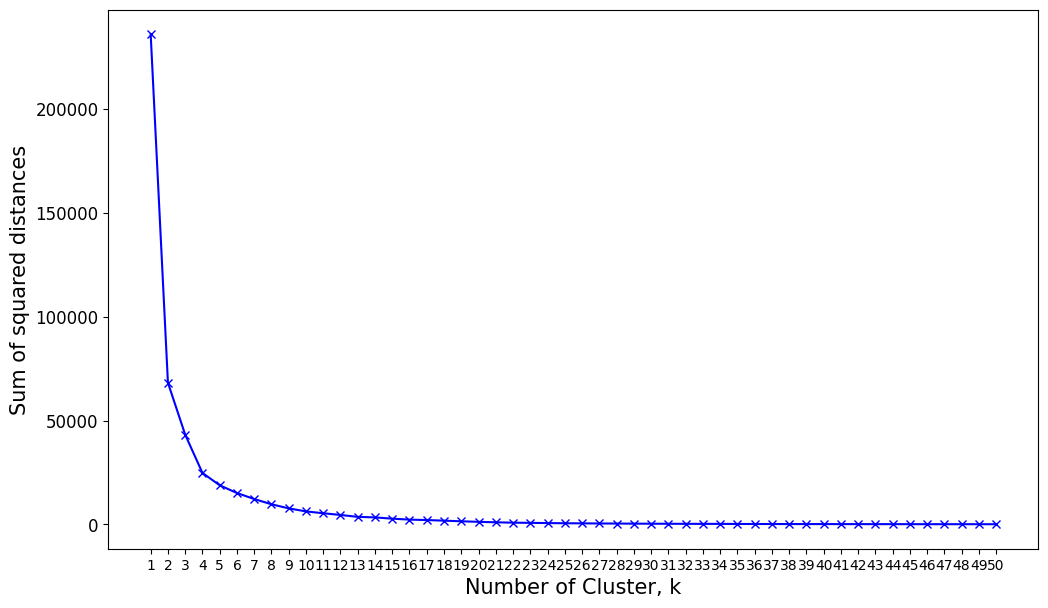

Ideal Number of Cluster =  43


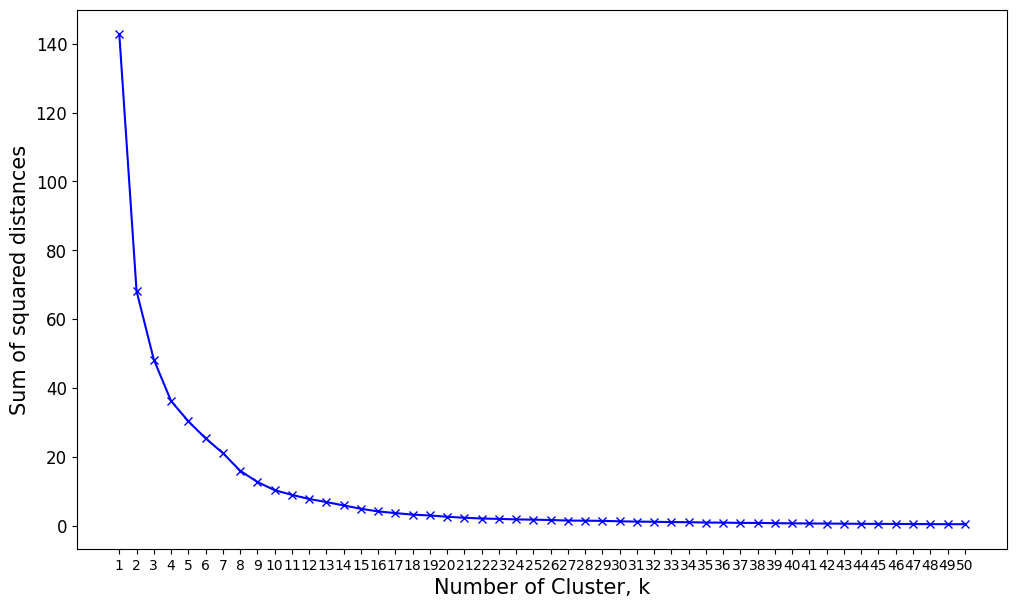

Ideal Number of Cluster =  25


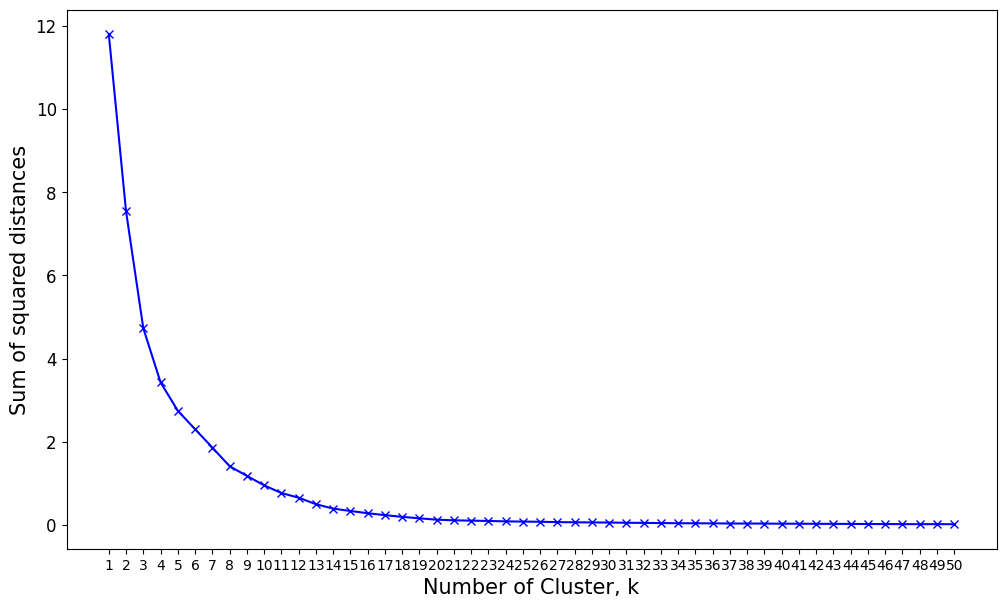

Ideal Number of Cluster =  15


In [8]:
from sklearn.cluster import KMeans

data_analysis = df_Numerically[["Lat_Var_Sum_X", "Lat_Var_Sum_Y"]]

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_analysis)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()

i = 1
tol = 100
while tol > 1e-1:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])

data_analysis = df_Numerically[["Lat_Var_Max_X", "Lat_Var_Max_Y"]]

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_analysis)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()

i = 1
tol = 100
while tol > 1e-1:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1]))
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])

data_analysis = df_Numerically[["Lat_Var_Avg_X", "Lat_Var_Avg_Y"]]

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_analysis)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()

i = 1
tol = 100
while tol > 1e-2:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])

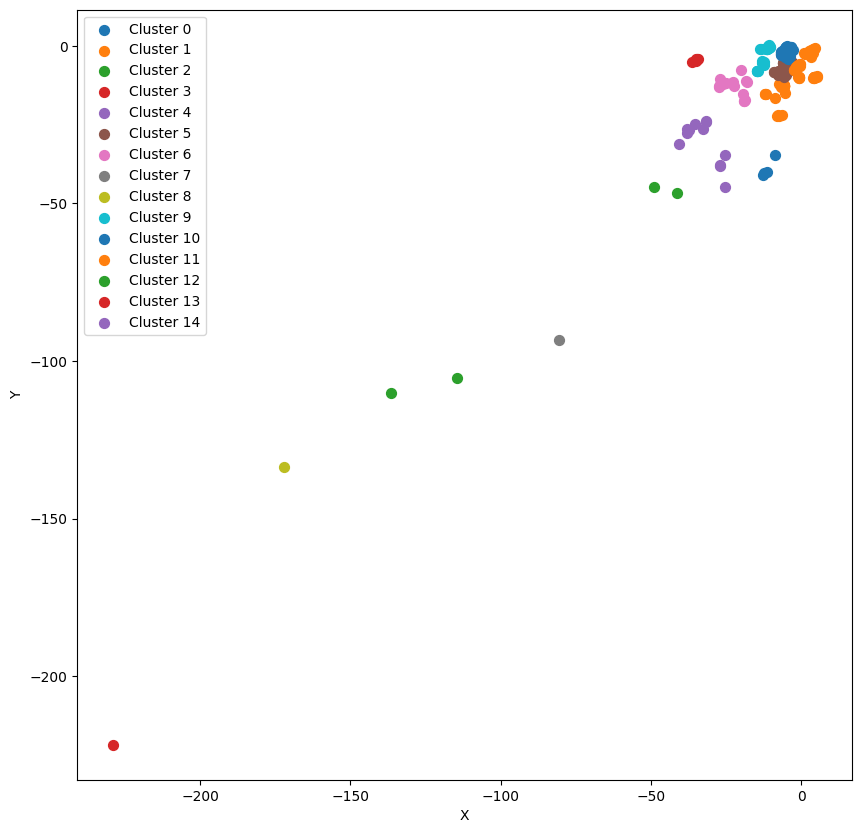

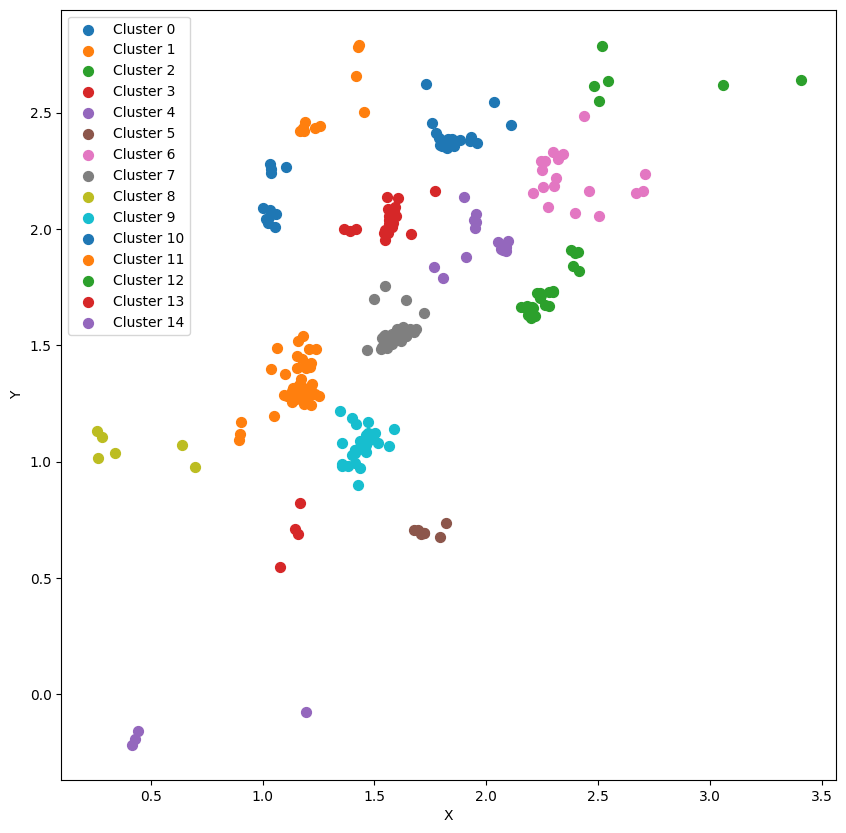

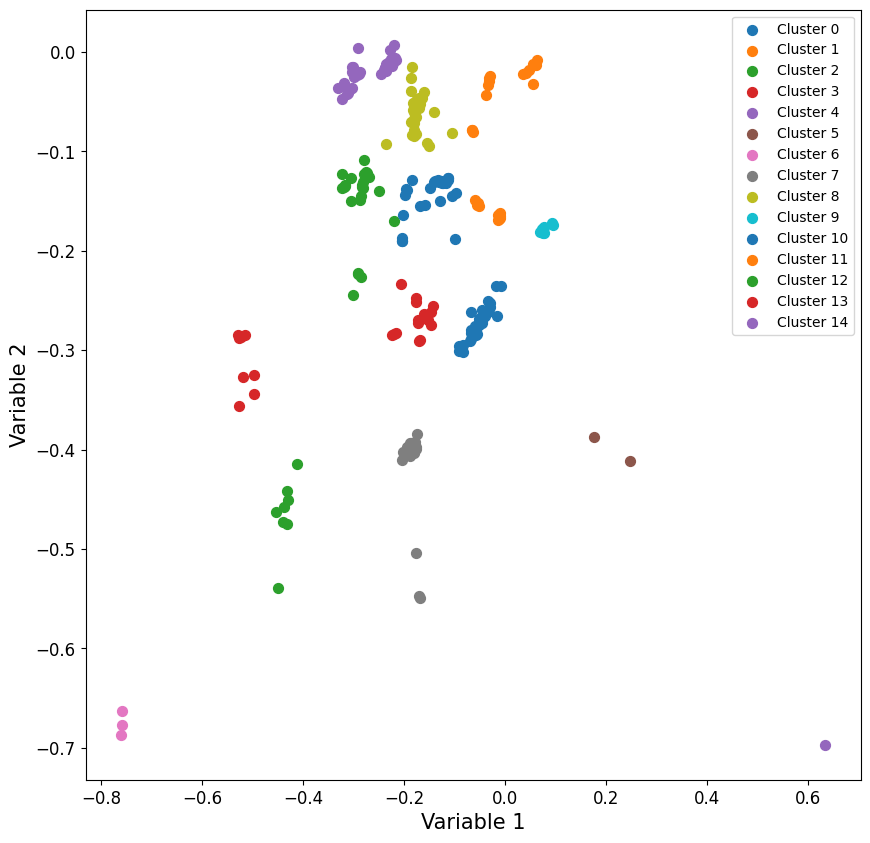

In [36]:
data_analysis = df_Numerically[["Lat_Var_Sum_X", "Lat_Var_Sum_Y"]]

n_clusters = 15

kmeans = KMeans(n_clusters=n_clusters).fit(data_analysis)

df_Numerically["IdLabel_Sum"] = kmeans.labels_

fig = plt.figure(figsize=(10, 10))

for i in range(n_clusters):
    plt.scatter(df_Numerically[df_Numerically["IdLabel_Sum"] == i]["Lat_Var_Sum_X"], 
                df_Numerically[df_Numerically["IdLabel_Sum"] == i]["Lat_Var_Sum_Y"], 
                s = 50, label = "Cluster " +str(i))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = "best")
plt.show()


data_analysis = df_Numerically[["Lat_Var_Max_X", "Lat_Var_Max_Y"]]

kmeans = KMeans(n_clusters=n_clusters).fit(data_analysis)

df_Numerically["IdLabel_Max"] = kmeans.labels_

fig = plt.figure(figsize=(10, 10))

for i in range(n_clusters):
    plt.scatter(df_Numerically[df_Numerically["IdLabel_Max"] == i]["Lat_Var_Max_X"], 
                df_Numerically[df_Numerically["IdLabel_Max"] == i]["Lat_Var_Max_Y"], 
                s = 50, label = "Cluster " +str(i))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = "best")
plt.show()


data_analysis = df_Numerically[["Lat_Var_Avg_X", "Lat_Var_Avg_Y"]]

kmeans = KMeans(n_clusters=n_clusters).fit(data_analysis)

df_Numerically["IdLabel_Avg"] = kmeans.labels_

fig = plt.figure(figsize=(10, 10))

for i in range(n_clusters):
    plt.scatter(df_Numerically[df_Numerically["IdLabel_Avg"] == i]["Lat_Var_Avg_X"], 
                df_Numerically[df_Numerically["IdLabel_Avg"] == i]["Lat_Var_Avg_Y"], 
                s = 50, label = "Cluster " +str(i)) 
plt.xlabel("Variable 1", fontsize = 15)
plt.ylabel("Variable 2", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = "best")
plt.show()

In [37]:
df_Numerically[df_Numerically["Framework"] == "CHA"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
101,CHA,-6.492631,-3.054284,1.569164,2.015551,-0.180351,-0.084841,10,3,8


In [38]:
df_Numerically[df_Numerically["Framework"] == "FAU"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
242,FAU,-37.908691,-27.656425,1.948865,2.003503,-0.197441,-0.144044,4,14,10


In [39]:
df_Numerically[df_Numerically["Framework"] == "BEA"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
167,BEA,-7.484337,-8.301663,1.927697,2.376971,-0.116943,-0.129713,5,0,10


In [40]:
df_Numerically[df_Numerically["Framework"] == "MFI"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
212,MFI,-26.377363,-11.701036,1.550232,1.510647,-0.274764,-0.121886,6,7,2


In [41]:
df_Numerically[df_Numerically["Framework"] == "MOR"]
# https://chemistry-europe.onlinelibrary.wiley.com/doi/abs/10.1002/chem.201901067

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
140,MOR,-10.435104,-0.277085,1.659684,1.562476,-0.217398,-0.005773,9,7,4


In [42]:
df_Numerically[df_Numerically["Framework"] == "LTA"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
58,LTA,-0.197021,-5.651059,1.58568,1.13845,-0.008209,-0.235461,11,9,0


In [43]:
df_Numerically[df_Numerically["Framework"] == "EUO"]

,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
217,EUO,-34.555355,-4.292836,1.181759,2.433958,-0.30853,-0.038329,13,11,4


In [44]:
df_Numerically[df_Numerically["Framework"] == "MRE"]

## Inter-zeolite transformation from *MRE to EUO: A new synthesis route for EUO zeolite


,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
141,MRE,-11.811154,-1.061852,1.577822,1.506358,-0.246066,-0.022122,9,7,4


In [45]:
df_Numerically[df_Numerically["Framework"] == "GIS"]


,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
24,GIS,-4.596264,-0.329995,1.180013,1.538109,-0.287266,-0.020625,10,1,4


In [46]:
df_Numerically[df_Numerically["Framework"] == "ANA"]


,Framework,Lat_Var_Sum_X,Lat_Var_Sum_Y,Lat_Var_Max_X,Lat_Var_Max_Y,Lat_Var_Avg_X,Lat_Var_Avg_Y,IdLabel_Sum,IdLabel_Max,IdLabel_Avg
132,ANA,-10.963181,0.090105,1.630552,1.567945,-0.2284,0.001877,9,7,4
